In [2]:
import jax
import jax.numpy as jnp
from approx_post.distributions import approx, joint, amortised
from approx_post import losses, optimisers
import seaborn as sns
import matplotlib.pyplot as plt
from arraytainers import Jaxtainer
sns.set({'figure.facecolor':'white', "figure.figsize":(10,7)})

In [3]:
def create_data(model, theta_min, theta_max, num_batch, noise_cov, prngkey):
    theta_vals = jnp.linspace(theta_min, theta_max, num_batch) # shape = (num_batch, dim_x)
    mean_vals = model(theta_vals).reshape(num_batch, -1) # shape = (num_batch, dim_theta)
    # Zero-mean samples:
    x_dim = mean_vals.shape[1]
    epsilon = jax.random.multivariate_normal(prngkey, mean=jnp.zeros(x_dim), cov=noise_cov, shape=(num_batch,)) # shape = (num_batch, dim_x)
    # Add each mean on:
    samples = mean_vals + epsilon # shape = (num_batch, x_dim)
    return samples

In [4]:
# First, let's define a model:
ndim = 1
model = lambda theta: theta**2
model_grad = jax.vmap(jax.vmap(jax.jacfwd(model), in_axes=0), in_axes=0)

In [36]:
prngkey = jax.random.PRNGKey(20)
theta_min, theta_max = -2, 2
num_batch = 100
noise_cov = jnp.identity(ndim)
data = create_data(model, theta_min, theta_max, num_batch, noise_cov, prngkey)

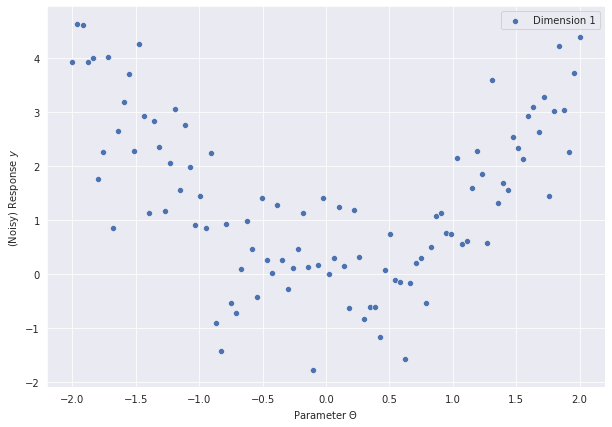

In [37]:
theta_vals = jnp.linspace(theta_min, theta_max, num_batch)
for i in range(ndim):
    sns.scatterplot(x=theta_vals, y=data[:,i], label=f"Dimension {i+1}")
plt.xlabel("Parameter $\Theta$")
plt.ylabel("(Noisy) Response $y$")
plt.show()

In [51]:
# Create Gaussian approximate distribution:
prngkey = jax.random.PRNGKey(21)
approx_dist = approx.Gaussian(ndim, var_bounds = (None, 5), mean_bounds = (-10,10))
# amortised_dist = amortised.NeuralNetwork(approx_dist, ndim, prngkey, num_layers=3, width=5, activation='relu')
amortised_dist = amortised.LinearRegression(approx_dist, ndim, prngkey, order=3)

In [52]:
# Create Joint distribution from forward model:
prior_mean = jnp.zeros(ndim)
prior_cov = jnp.identity(ndim)
noise_cov = 0.5*jnp.identity(ndim)
joint_dist = joint.ModelPlusGaussian(model, noise_cov, prior_mean, prior_cov, model_grad)

In [66]:
prngkey = jax.random.PRNGKey(22)
loss = losses.ReverseKL(joint_dist, use_reparameterisation=True)
optimiser = optimisers.Adam()
optimiser.fit(amortised_dist, loss, data, prngkey, verbose=True, num_samples=100)

Loss = 18114.763671875, Params = Jaxtainer({'A': DeviceArray([[-0.1452761 ,  0.39999998],
             [-0.2977961 , -0.09999997],
             [ 0.94150543, -0.10000001],
             [-0.07050213, -0.10000002]], dtype=float32)})
Loss = 10814.6181640625, Params = Jaxtainer({'A': DeviceArray([[-0.23861164,  0.4695253 ],
             [-0.3911899 , -0.02978469],
             [ 0.8480329 , -0.02938337],
             [-0.16401795, -0.02906372]], dtype=float32)})
Loss = 19.679731369018555, Params = Jaxtainer({'A': DeviceArray([[-0.31094193,  0.5236449 ],
             [-0.46343556,  0.024948  ],
             [ 0.775683  ,  0.02563016],
             [-0.23637557,  0.02620975]], dtype=float32)})
Loss = 548.4878540039062, Params = Jaxtainer({'A': DeviceArray([[-0.3674488 ,  0.56293845],
             [-0.5195615 ,  0.06460863],
             [ 0.7195676 ,  0.06531805],
             [-0.2923444 ,  0.06597134]], dtype=float32)})
Loss = 8945.6611328125, Params = Jaxtainer({'A': DeviceArray([[-0.3920

Loss = 164.0330047607422, Params = Jaxtainer({'A': DeviceArray([[-0.39858818,  0.44097176],
             [-0.48812503, -0.03888463],
             [ 0.7760118 , -0.03619134],
             [-0.20481199, -0.02993376]], dtype=float32)})
Loss = 145.67788696289062, Params = Jaxtainer({'A': DeviceArray([[-0.4002603 ,  0.44282326],
             [-0.4883191 , -0.03604937],
             [ 0.7759641 , -0.0330601 ],
             [-0.20430785, -0.02638218]], dtype=float32)})
Loss = 116.07572174072266, Params = Jaxtainer({'A': DeviceArray([[-0.401157  ,  0.44416282],
             [-0.48775786, -0.03311291],
             [ 0.776646  , -0.02952757],
             [-0.20308393, -0.02227935]], dtype=float32)})
Loss = 85.7136001586914, Params = Jaxtainer({'A': DeviceArray([[-0.40152028,  0.44603068],
             [-0.48666605, -0.02972297],
             [ 0.7778407 , -0.02558378],
             [-0.2013551 , -0.01778524]], dtype=float32)})
Loss = 59.621097564697266, Params = Jaxtainer({'A': DeviceArray([[-

Loss = 8.309942245483398, Params = Jaxtainer({'A': DeviceArray([[-0.39764172,  0.44564894],
             [-0.44305158, -0.0091676 ],
             [ 0.81476414, -0.00435796],
             [-0.15384951,  0.00930484]], dtype=float32)})
Loss = 8.266034126281738, Params = Jaxtainer({'A': DeviceArray([[-0.3981934 ,  0.4448868 ],
             [-0.44246572, -0.00952632],
             [ 0.81496143, -0.00483857],
             [-0.15343781,  0.00891112]], dtype=float32)})
Loss = 8.226837158203125, Params = Jaxtainer({'A': DeviceArray([[-0.39877054,  0.44415122],
             [-0.44190633, -0.00985907],
             [ 0.8151263 , -0.00529353],
             [-0.15306155,  0.00854411]], dtype=float32)})
Loss = 8.191242218017578, Params = Jaxtainer({'A': DeviceArray([[-0.39937013,  0.44344124],
             [-0.44137004, -0.01016685],
             [ 0.81526244, -0.00572396],
             [-0.15271682,  0.0082026 ]], dtype=float32)})
Loss = 8.158464431762695, Params = Jaxtainer({'A': DeviceArray([[-0.

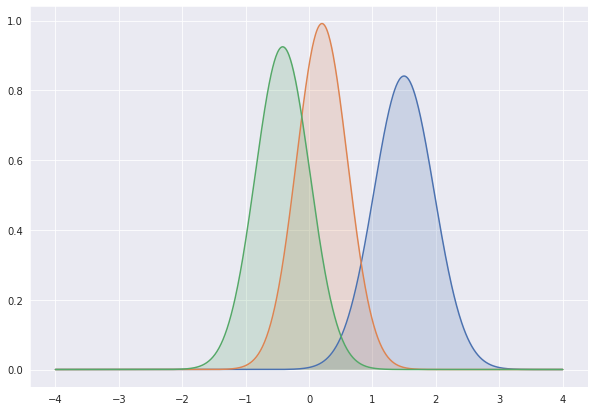

In [67]:
theta_vals = jnp.linspace(-4, 4, 1000)
for x_idx in (0, 25, 50):
    pdf = jnp.exp(amortised_dist.logpdf(theta_vals[:,None], x=data[x_idx,:]))
    ax = sns.lineplot(x=theta_vals, y=pdf)
    ax.fill_between(theta_vals, pdf, alpha=0.2)
plt.show()

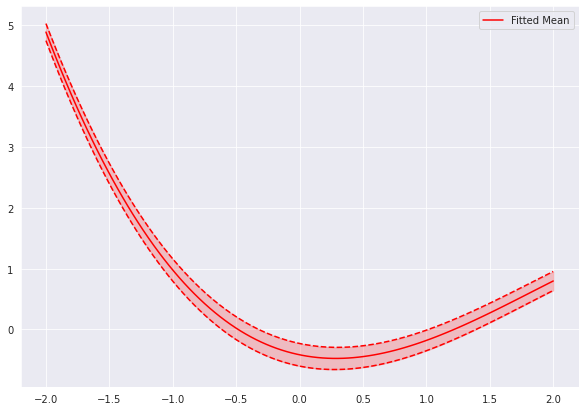

In [68]:
plot_vals = jnp.linspace(-2, 2, 100)
theta_vals = jnp.linspace(theta_min, theta_max, num_batch)
pred_phi = amortised_dist.phi(plot_vals[:,None])
pred_mean, pred_cov = pred_phi['mean'].squeeze(), pred_phi['chol_diag'].squeeze()**2
mean_plus_cov = pred_mean+pred_cov
mean_minus_cov = pred_mean-pred_cov
ax = sns.lineplot(x=plot_vals, y=pred_mean, label=f"Fitted Mean", color='red')
sns.lineplot(x=plot_vals, y=mean_plus_cov, color='red', linestyle='--')
sns.lineplot(x=plot_vals, y=mean_minus_cov, color='red', linestyle='--')
ax.fill_between(plot_vals, mean_minus_cov, mean_plus_cov, color="red", alpha=0.2)
# sns.scatterplot(x=theta_vals, y=data[:,0], label=f"Observations")
plt.show()

In [64]:
theta_vals = jnp.linspace(theta_min, theta_max, num_batch)[:,None]
target = Jaxtainer({'mean': data[:,None], 'chol_diag': 0.5*jnp.ones((data[:,None].shape))})
amortised_dist.initialise(theta_vals, target)

In [20]:
theta_vals = jnp.linspace(theta_min, theta_max, num_batch)[:,None]
target = Jaxtainer({'mean': theta_vals[:,None]**2, 'chol_diag': 0.01*jnp.ones((theta_vals[:,None].shape))})
amortised_dist.initialise(theta_vals, target) 

In [ ]:
amortised_dist.logpdf(jnp.array([[]]), x=jnp.array([[0.5]])))

In [17]:
data

DeviceArray([[3.764529]], dtype=float32)